In [1]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_excel("/Users/yintianyi/Desktop/Desktop - 殷天逸的MacBook Air (2)/投出去的简历.xlsx", sheet_name="24年8月-9月")  
job_descriptions = df['JD'].dropna().astype(str)

In [3]:
# Clean text: remove non-alphabetic characters and lowercase everything
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text.lower()
cleaned_jds = job_descriptions.apply(clean_text)

# Top Unigrams

In [4]:
custom_stop_words = [
    # general
    'experience', 'skills', 'team', 'work', 'ability', 'required', 'including',
    'must', 'role', 'year', 'years', 'company', 'position', 'working', 'need',
    'strong', 'excellent', 'provide', 'support', 'develop', 'help', 'knowledge',
    'responsibilities', 'requirement', 'requirements', 'preferred', 'candidate',
    'candidates', 'opportunity', 'qualified', 'successful', 'join', 'environment',
    'benefits', 'based', 'level', 'related', 'applicants', 'understanding','tools',
    'people', 'base', 'like',
    
    # verbs
    'ensure', 'ability', 'deliver', 'drive', 'create', 'collaborate', 'manage',
    'maintain', 'implement', 'build', 'lead', 'working', 'make', 'use', 'apply',
    'using', 'providing', 'building', 'looking', 'ensuring', 'understand',
    
    # org
    'organization', 'professional', 'departments', 'businesses', 'global',
    'internal', 'external', 'stakeholders', 'employees', 'clients', 'customers',
    'customer',
    
    # hiring
    'fulltime', 'onsite', 'hybrid', 'remote', 'position', 'location',
    'description', 'overview', 'summary', 'job', 'posting', 'qualifications',
    'hours', 'week', 'salary', 'pay', 'wage', 'bonus', 'veteran', 'color',
    'care'
]
all_stopwords = list(text.ENGLISH_STOP_WORDS.union(custom_stop_words))

In [5]:
# Extract Top Unigrams (Single Words)
unigram_vectorizer = CountVectorizer(stop_words=all_stopwords, max_features=1000)
unigram_matrix = unigram_vectorizer.fit_transform(cleaned_jds)

unigram_freq = dict(zip(unigram_vectorizer.get_feature_names_out(), unigram_matrix.toarray().sum(axis=0)))
sorted_unigrams = sorted(unigram_freq.items(), key=lambda x: x[1], reverse=True)
top_unigrams = sorted_unigrams[:50]

In [6]:
# Convert to DataFrame
top_unigrams_df = pd.DataFrame(top_unigrams, columns=['Keyword', 'Frequency'])
top_unigrams_df

,Keyword,Frequency
0,data,7011
1,business,3604
2,analysis,1500
3,analytics,1255
4,management,1253
5,insights,1113
6,time,1094
7,analyst,1091
8,information,1031
9,reporting,981


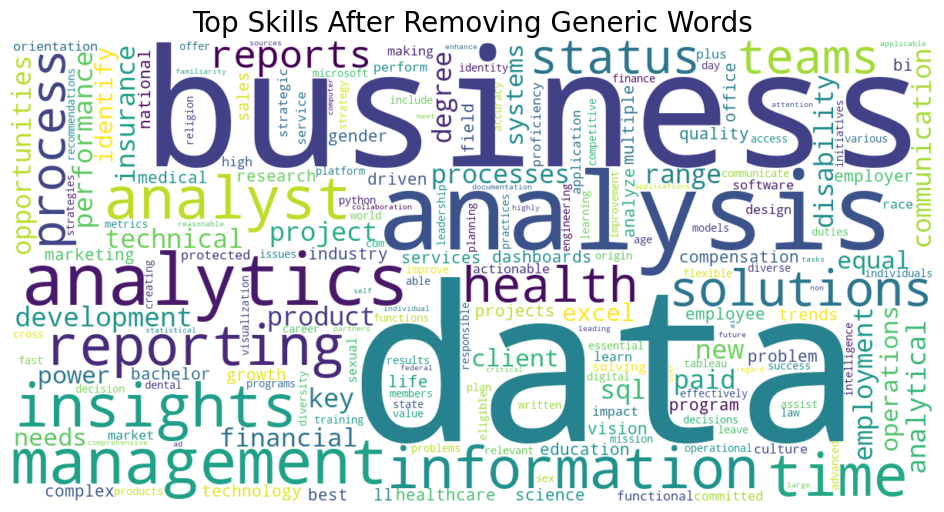

In [7]:
# Generate WordCloud 
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(unigram_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Skills After Removing Generic Words", fontsize=20)
plt.show()

📌 Most Frequent Keywords (Unigrams)

After removing generic and non-technical words, the most common keywords included:

	•	tools/technologies: sql, python, tableau, power bi
	•	skills: communication, analysis, problem solving 
	•	concepts: data, analytics, visualization, reporting

These results indicate a strong emphasis on data processing tools and analytical thinking across roles.

# Top Bigrams

In [8]:
# Extract and Filter Bigrams
bigram_vectorizer = CountVectorizer(
    stop_words=all_stopwords,
    ngram_range=(2, 2),
    max_features=1000
)

bigram_matrix = bigram_vectorizer.fit_transform(cleaned_jds)
bigram_freq = dict(zip(bigram_vectorizer.get_feature_names_out(), bigram_matrix.toarray().sum(axis=0)))

In [9]:
# Manually remove non-informative bigrams (e.g. diversity clauses, EEO)
bigrams_to_remove = [
    'sexual orientation', 'gender identity', 'national origin',
    'bachelor degree', 'equal employment', 'data analyst', 'dental vision', 
    'race color', 'paid time', 'color religion', 'medical dental', 'regard race',
    'ad hoc', 'united states', 'veteran status', 'protected veteran', 
    'orientation gender', 'life insurance', 'marital status', 'sex sexual', 
    'religion sex', 'state local', 'paid holidays', 'degree business', 
    'federal state', 'genetic information', 'parental leave', 'consideration employment',
    'receive consideration', 'vision insurance', 'disability status', 'business data',
    'status protected', 'proud equal', 'characteristic protected', 'paid parental',
    'application process', 'https www', 'origin disability', 'age disability',
    'continuous improvement', 'day day', 'legally protected', 'action employer',
    'world class', 'local laws', 'insurance paid', 'origin age', 'employment regard',
    'sex national', 'base range', 'diversity equity', 'fair chance', 'business data',
    'employer receive', 'identity gender', 'disability veteran', 'dental insurance',
    'employee assistance', 'duties assigned', 'health savings', 'mental disability',
    'hiring process', 'protected law', 'compensation rate', 'sick leave', 'type time',
    'career growth', 'play key', 'paid sick'
]

filtered_bigrams = {k: v for k, v in bigram_freq.items() if k not in bigrams_to_remove}


In [10]:
# Show Top 50 Bigrams
top_50_bigrams = sorted(filtered_bigrams.items(), key=lambda x: x[1], reverse=True)[:50]
bigram_df = pd.DataFrame(top_50_bigrams, columns=["Bigram", "Frequency"])
bigram_df

,Bigram,Frequency
0,data analysis,483
1,power bi,393
2,problem solving,363
3,data driven,323
4,equal employer,316
5,decision making,305
6,business analyst,297
7,data analytics,297
8,cross functional,281
9,business intelligence,244


We analyzed the top 50 most frequent 2-word phrases (bigrams), and found that all of them — those that appear more than 100 times — are very general and not the specific technical skills we’re looking for.
Therefore, we want to select the top 50 bigrams with a frequency of less than 100 for further analysis.

In [11]:
# Show Top 50 Low-Frequency Bigrams (Freq < 100)
bigrams_under_100 = {k: v for k, v in bigram_freq.items() if v < 100}
top_50_under_100 = sorted(bigrams_under_100.items(), key=lambda x: x[1], reverse=True)[:50]
low_freq_bigrams_df = pd.DataFrame(top_50_under_100, columns=["Bigram", "Frequency"])
low_freq_bigrams_df

,Bigram,Frequency
0,microsoft office,98
1,business analysis,96
2,analyze data,93
3,identify trends,93
4,duties assigned,91
5,characteristic protected,90
6,tableau power,90
7,term disability,90
8,written communication,90
9,business data,89


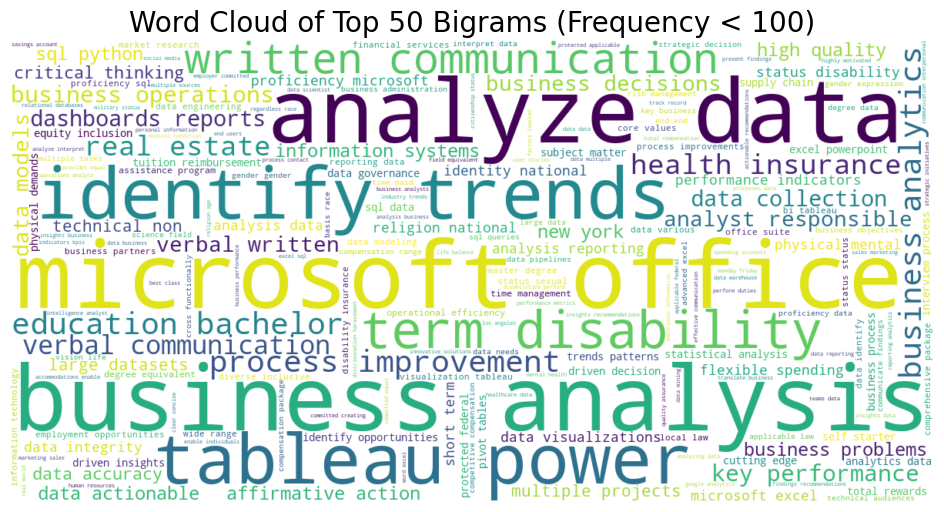

In [12]:
# WordCloud for Top 50 Low-Frequency Bigrams (Freq < 100)
# Convert top 50 low-frequency bigrams into a frequency dictionary
low_freq_dict = {k: v for k, v in bigrams_under_100.items() if k not in bigrams_to_remove}

# Generate word cloud
low_freq_wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(low_freq_dict)

plt.figure(figsize=(12, 6))
plt.imshow(low_freq_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Top 50 Bigrams (Frequency < 100)", fontsize=20)
plt.show()

While analyzing bigrams with frequency < 100, we noticed that many of them still consisted of overly general or repetitive phrases (e.g., “business needs”, “work environment”, “team members”). These terms, although less common than the top 100, still did not provide meaningful insight into skill requirements.

To focus on more unique and potentially insightful patterns, we further narrowed our selection to bigrams with frequency < 50. This allowed us to capture more specific, role-defining phrases that may otherwise be overlooked but reflect niche expectations or emerging trends in job postings.

In [13]:
# Show Top 50 Low-Frequency Bigrams (Freq < 50)
bigrams_under_50 = {k: v for k, v in bigram_freq.items() if v < 50}
top_50_under_50 = sorted(bigrams_under_50.items(), key=lambda x: x[1], reverse=True)[:50]
low_freq_bigrams_df = pd.DataFrame(top_50_under_50, columns=["Bigram", "Frequency"])
low_freq_bigrams_df

,Bigram,Frequency
0,business objectives,49
1,data pipelines,49
2,gender gender,49
3,mental disability,49
4,multiple tasks,49
5,risk management,49
6,sick leave,49
7,strategic decision,49
8,vision life,49
9,communicate findings,48


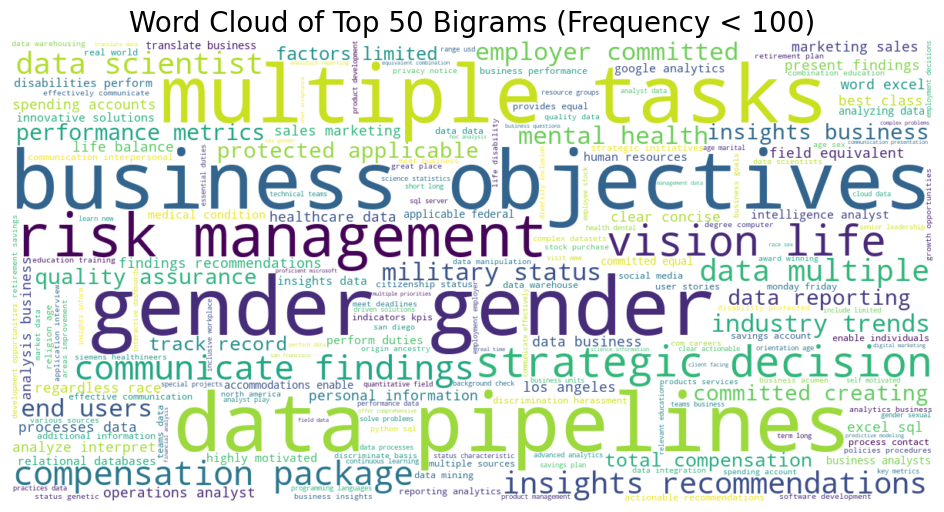

In [14]:
# WordCloud for Top 50 Low-Frequency Bigrams (Freq < 50)
# Convert top 50 low-frequency bigrams into a frequency dictionary
low_freq_dict = {k: v for k, v in bigrams_under_50.items() if k not in bigrams_to_remove}

# Generate word cloud
low_freq_wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(low_freq_dict)

plt.figure(figsize=(12, 6))
plt.imshow(low_freq_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Top 50 Bigrams (Frequency < 100)", fontsize=20)
plt.show()

We extracted the top bigrams to capture more contextual skill sets and role expectations. Generic and diversity-related phrases (e.g., “equal opportunity”, “sexual orientation”) were manually removed for clarity.

Among the top 50 bigrams with frequency < 50, we found:

	•	Technical terms: data quality, sql python, statistical analysis, business intelligence
	•	Soft skills: written communication, critical thinking
	•	Role focus: dashboards reports, project management, key performance

These suggest employers are looking for hybrid candidates who possess both technical expertise and communication skills.

# ✅ Conclusion

This analysis reinforces the importance of highlighting:

	•	SQL, Python, and BI tool experience
	•	Analytical frameworks like trend analysis and performance metrics
	•	Strong communication and reporting capabilities

Tailoring resumes and applications to reflect both quantitative skills and business-facing insights will increase alignment with current market demand.